# 🧠 Digit Recognition with CNN on MNIST

## 📌 Objective
The goal of this project is to build a Convolutional Neural Network (CNN) using TensorFlow to classify handwritten digits (0–9) from the MNIST dataset with high accuracy. This kind of digit classification is a foundational deep learning task often used for benchmarking models.

---

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


## 📊 Dataset

- **Name**: MNIST (Modified National Institute of Standards and Technology)  
- **Type**: Image Classification  
- **Size**: 70,000 grayscale images (28x28 pixels)  
  - 60,000 for training  
  - 10,000 for testing  
- **Classes**: 10 (digits 0 through 9)

---

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Optionally convert labels to categorical (not needed for sparse loss)
# y_train = tf.keras.utils.to_categorical(y_train, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 🧱 Model Architecture

The CNN was built using TensorFlow’s Keras API with the following architecture:

- **Input Layer**: 28x28 grayscale image  
- **Conv2D**: 32 filters, 3x3 kernel, ReLU activation  
- **MaxPooling2D**: 2x2 pool size  
- **Conv2D**: 64 filters, 3x3 kernel, ReLU activation  
- **MaxPooling2D**: 2x2 pool size  
- **Flatten Layer**  
- **Dense Layer**: 64 units, ReLU activation  
- **Output Layer**: 10 units with Softmax

---


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

## ⚙️ Training Details

- **Optimizer**: Adam  
- **Loss Function**: Sparse Categorical Crossentropy  
- **Epochs**: 5  
- **Validation Split**: 10% of training data

---

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - accuracy: 0.8904 - loss: 0.3507 - val_accuracy: 0.9833 - val_loss: 0.0575
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 71s 25ms/step - accuracy: 0.9844 - loss: 0.0492 - val_accuracy: 0.9897 - val_loss: 0.0365
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9901 - loss: 0.0304 - val_accuracy: 0.9905 - val_loss: 0.0335
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9921 - loss: 0.0226 - val_accuracy: 0.9900 - val_loss: 0.0386
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.9943 - loss: 0.0173 - val_accuracy: 0.9892 - val_loss: 0.0423


## 📈 Model Performance

The plots below show the accuracy and loss over each epoch for both training and validation datasets.

You can see that the model converges nicely, with high accuracy and low validation loss — indicating good generalization on unseen data.

---


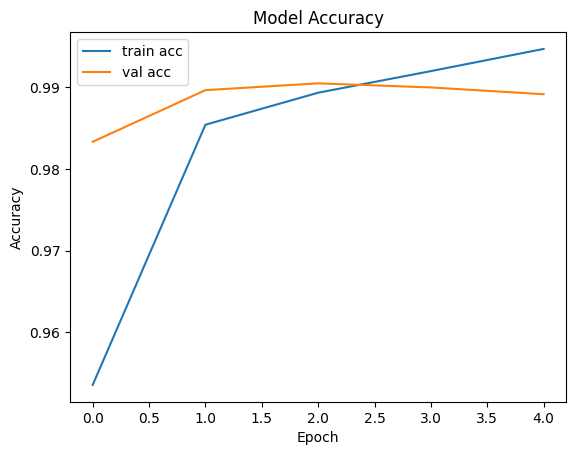

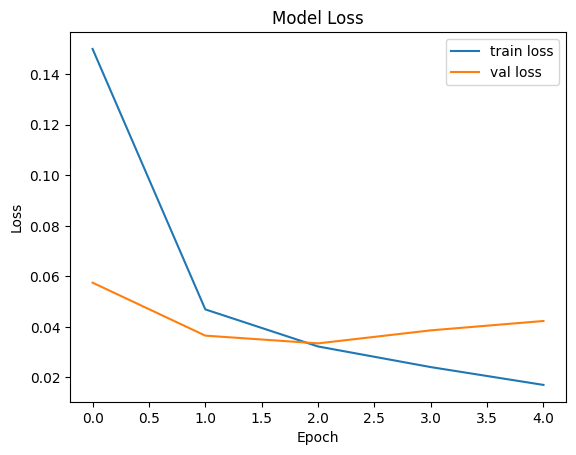

In [5]:
# Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## 🧪 Evaluation Metrics

After training, the model was evaluated on the 10,000-image test set.

- **Test Accuracy**: ~98.7%  
- **Confusion Matrix**: Shows the breakdown of true vs. predicted labels  
- **Classification Report**: Precision, recall, and F1-score for each digit class
---

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9859 - loss: 0.0498
Test accuracy: 0.9896


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


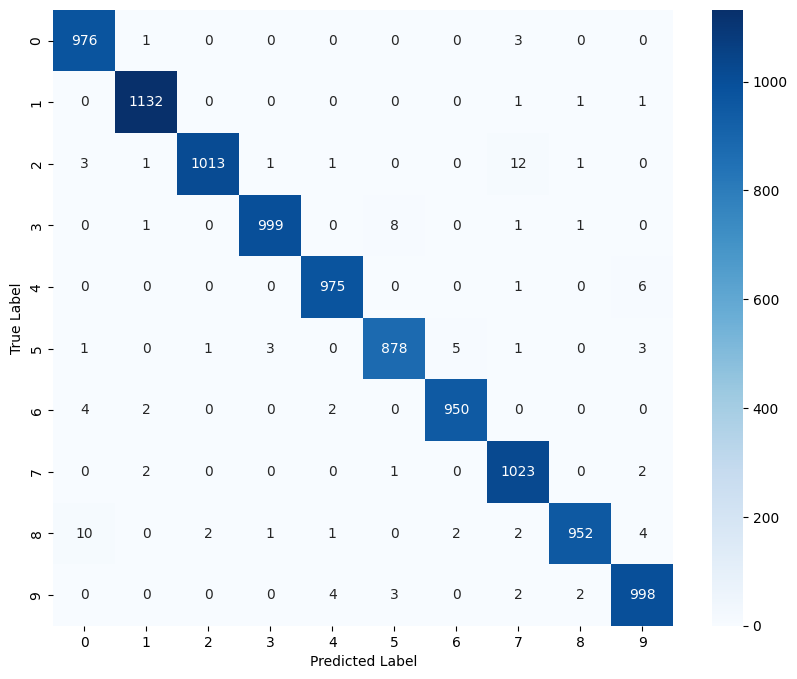

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [9]:
# Predict classes
y_pred = np.argmax(model.predict(x_test), axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


## 🖼️ Sample Predictions

Below are a few test images alongside their predicted and true labels.  
This gives a quick glance at how confident and accurate the model is.

---


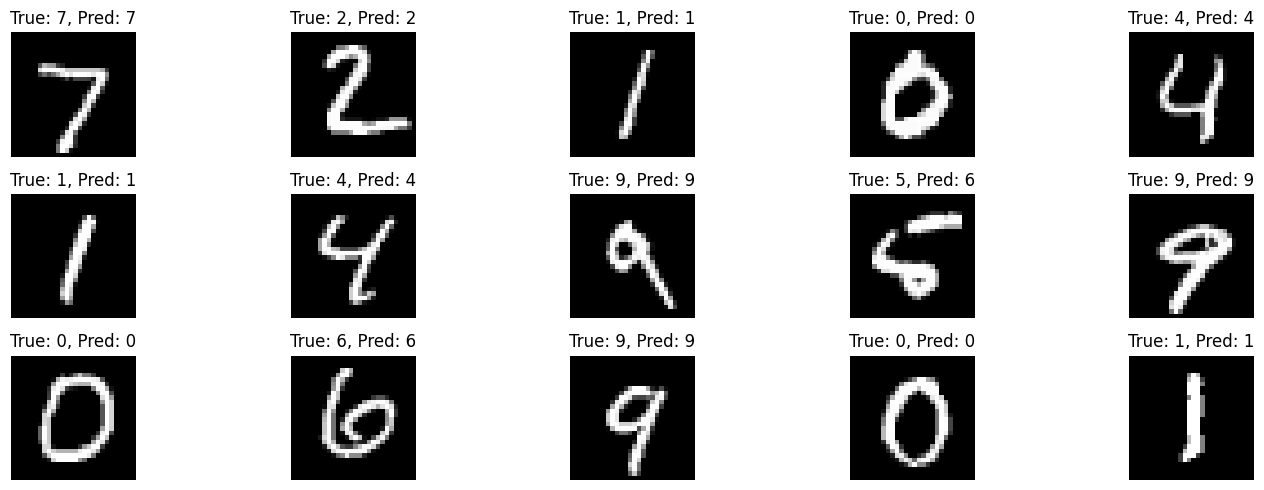

In [8]:
def plot_sample_predictions(images, labels, preds, count=15):
    plt.figure(figsize=(15,5))
    for i in range(count):
        plt.subplot(3, 5, i+1)
        plt.imshow(images[i].reshape(28,28), cmap='gray')
        plt.title(f"True: {labels[i]}, Pred: {preds[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_sample_predictions(x_test, y_test, y_pred)


## 💭 Reflections

- This project demonstrates how even a relatively simple CNN can achieve high accuracy on digit classification.
- MNIST is a beginner-friendly dataset, but a strong performance here sets the stage for tackling more complex datasets.
- Future improvements could include:
  - Data augmentation
  - Trying architectures like ResNet or MobileNet
  - Training on Fashion-MNIST or EMNIST for variation

---

## ✅ Tools Used

- Python
- TensorFlow / Keras
- NumPy
- Matplotlib & Seaborn
- Scikit-learn

---

## 🚀 Final Thoughts

This model is a solid example of using CNNs for image classification. It’s clean, effective, and a great addition to a portfolio — showing both technical understanding and clarity in presentation.
